In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random

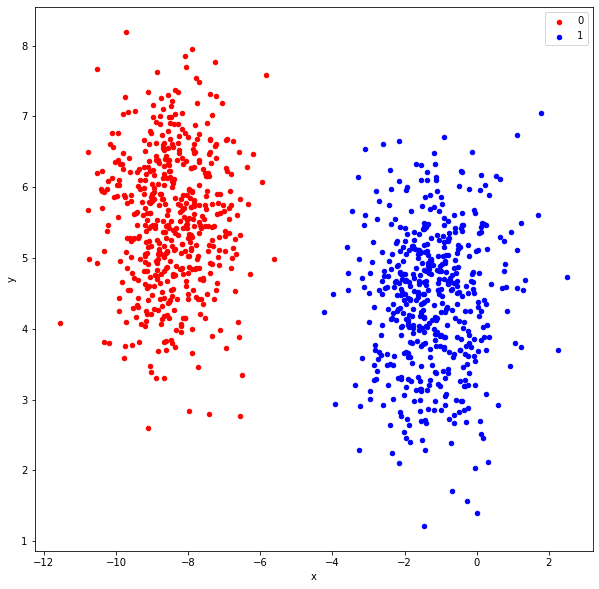

In [375]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state = 7)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

fig, ax = plt.subplots(figsize = (10,10))
grouped = df.groupby('label')
colors = {0:'red', 1:'blue', 2:'green', 3: 'black'}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = colors[key])
plt.show()

In [378]:
class Logistic_Regression:
    
    def __init__(self, x, y, optimization, learning_rate, n_iter, batch_size = 100):
        
        self.x = x
        self.y = y
        self.opt = optimization
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    def sigmoid(self, x):
        
        return 1/(1 + np.exp(-x))
    
    def cost_derivative(self, batch_idx):
        
        x = self.x.loc[batch_idx].values
        y = self.y.loc[batch_idx]
        derivative = (self.sigmoid(x.dot(self.w)) - y).dot(x)/len(x)
        
        return derivative
    
    def gradient_descent(self):
        
        self.w = np.random.normal(loc = 0, scale = 0.1, size = len(self.x.columns))
        if self.opt == 'batch':
            index = self.x.index
        elif self.opt == 'stochastic':
            index = random.sample(list(self.x.index), self.batch_size)
        for i in range(self.n_iter):
            cost_derivative = self.cost_derivative(index)
            self.w -= self.learning_rate * cost_derivative
         
    def train(self):
        
        self.x['bias'] = 1 #add bias
        self.gradient_descent()
        
    def predict(self, x):
        
        pred = self.sigmoid(x.dot(self.w))
        pred = np.where(pred > 0.5, 1, 0)
        
        return pred
    
    def plot_decision_boundary(self):
        
        min1, max1 = self.x.iloc[:,0].min() - 1, self.x.iloc[:,0].max() + 1
        min2, max2 = self.x.iloc[:,1].min() - 1, self.x.iloc[:,1].max() + 1
        
        x1grid = np.arange(min1, max1, 0.1)
        x2grid = np.arange(min2, max2, 0.1)
        xx, yy = np.meshgrid(x1grid, x2grid)
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        grid = np.hstack((r1,r2))
        grid = np.append(grid, np.ones((grid.shape[0],1)), axis = 1)
        
        yhat = self.predict(grid)
    
        zz = np.array(yhat).reshape(xx.shape)
        plt.figure(figsize=(10,10))
        plt.contourf(xx, yy, zz, cmap = 'Paired')
        #colors = {0:'red', 1:'blue', 2:'green', 3: 'black'}
        for cls in self.y.unique():
            idx = self.y[self.y == cls].index
            plt.scatter(self.x.iloc[idx, 0], self.x.iloc[idx, 1], cmap = 'Paired')

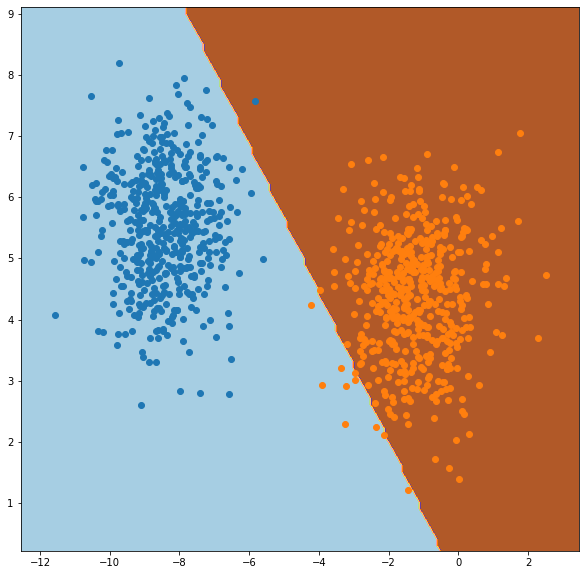

In [379]:
LR = Logistic_Regression(df[['x','y']], df['label'], optimization = 'stochastic', learning_rate = 0.1,
                         n_iter = 100)
LR.train()
LR.plot_decision_boundary()